In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

Mount Google Drive to access dataset from the drive.

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


Unzip the dataset. Lucky for us, the dataset has already been split into training and validation set.

In [0]:
!unzip "/content/drive/My Drive/ML datasets/face_Expression.zip"

In [6]:
import os
for expression in os.listdir("train/"):
    print(str(len(os.listdir("train/" + expression))) + " " + expression + " images")

4103 fear images
4982 neutral images
4938 sad images
7164 happy images
3205 surprise images
3993 angry images
436 disgust images


Small code snippet to view training images randomly!

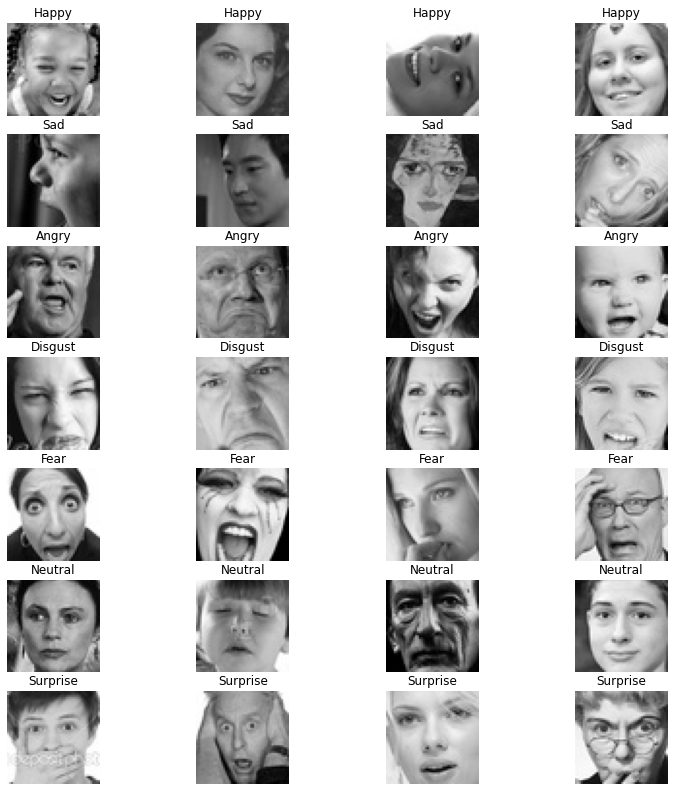

In [7]:
from PIL import Image
from glob import glob

happy_dir = glob("train/happy/*.jpg")
sad_dir = glob("train/sad/*.jpg")
angry_dir = glob("train/angry/*.jpg")

disgust_dir = glob("train/disgust/*.jpg")
fear_dir = glob("train/fear/*.jpg")
neutral_dir = glob("train/neutral/*.jpg")
surprise_dir = glob("train/surprise/*.jpg")

#get random set of images
happy = np.random.choice(happy_dir, 4)
sad = np.random.choice(sad_dir, 4)
angry = np.random.choice(angry_dir, 4)

disgust = np.random.choice(disgust_dir,4)
fear = np.random.choice(fear_dir,4)
neutral = np.random.choice(neutral_dir,4)
surprise = np.random.choice(surprise_dir,4)

data = np.concatenate((happy, sad, angry, disgust, fear, neutral, surprise))
labels = 4 * ['Happy'] + 4 *['Sad'] + 4 * ['Angry'] + 4 * ['Disgust'] + \
4 * ['Fear'] + 4 * ['Neutral'] + 4 * ['Surprise'] 

N, R, C = 28, 7, 4
plt.figure(figsize=(13, 14))
for k, (src, label) in enumerate(zip(data, labels)):
    im = Image.open(src).convert('RGB')
    plt.subplot(R, C, k+1)
    plt.title(label)
    plt.imshow(np.asarray(im))
    plt.axis('off')

In [8]:
from keras.preprocessing.image import ImageDataGenerator

WIDTH = 48
HEIGHT = 48
BATCH_SIZE = 64
NUM_CLASSES = 7

TRAIN_DIR = "/content/train/"
TEST_DIR = "/content/validation/"

Using TensorFlow backend.


Using Image Augmentation to create more training samples in memory at run time.

In [0]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [0]:
validation_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [11]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(WIDTH,HEIGHT),
    batch_size = BATCH_SIZE,
    class_mode = "categorical",
    color_mode="grayscale",
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(WIDTH,HEIGHT),
    batch_size = BATCH_SIZE,
    class_mode = "categorical",
    color_mode="grayscale",
    shuffle=True
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


Designing the CNN using Sequential Model of Keras.
Please feel free to play with architecture!

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,MaxPooling2D,Flatten,Activation,BatchNormalization
from keras.layers import Dense
from keras.optimizers import Adam,RMSprop

In [0]:
model = Sequential()
model.add(Conv2D(64,(3,3), input_shape=(WIDTH,HEIGHT,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Fully connected layer 2nd layer
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(7, activation='softmax'))

In [0]:
#Using Adam optimizer and Learning rate as 0.001. You can play with this as well.
model.compile(optimizer=Adam(learning_rate=0.001,beta_1=0.9, beta_2=0.999),loss="categorical_crossentropy",metrics=['accuracy'])

In [23]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS = validation_generator.n//validation_generator.batch_size

history = model.fit(
    x = train_generator,
    steps_per_epoch = STEPS_PER_EPOCH,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = VALIDATION_STEPS
)

Epoch 1/15
450/450 [==============================] - 25s 56ms/step - loss: 1.7956 - accuracy: 0.2572 - val_loss: 1.7054 - val_accuracy: 0.2861
Epoch 2/15
450/450 [==============================] - 25s 55ms/step - loss: 1.6666 - accuracy: 0.3294 - val_loss: 1.5318 - val_accuracy: 0.3146
Epoch 3/15
450/450 [==============================] - 25s 55ms/step - loss: 1.5205 - accuracy: 0.4033 - val_loss: 1.7891 - val_accuracy: 0.3919
Epoch 4/15
450/450 [==============================] - 25s 55ms/step - loss: 1.4326 - accuracy: 0.4447 - val_loss: 1.5590 - val_accuracy: 0.4037
Epoch 5/15
450/450 [==============================] - 25s 55ms/step - loss: 1.3656 - accuracy: 0.4751 - val_loss: 1.4870 - val_accuracy: 0.4212
Epoch 6/15
450/450 [==============================] - 25s 55ms/step - loss: 1.3149 - accuracy: 0.4942 - val_loss: 1.5473 - val_accuracy: 0.4290
Epoch 7/15
450/450 [==============================] - 25s 56ms/step - loss: 1.2754 - accuracy: 0.5125 - val_loss: 1.3508 - val_accuracy:

Surprisingly, we can achieve more than 50% accuracy with just 15 epochs! I encourage you all to take this experiment further for it's improvement!

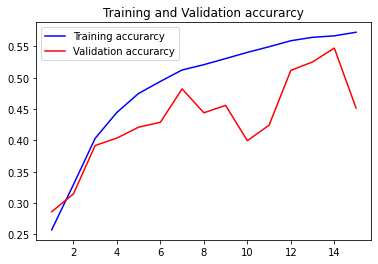

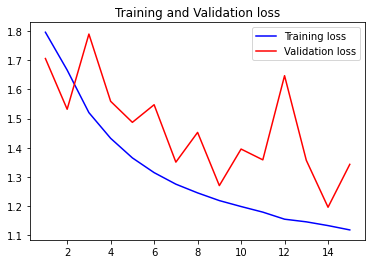

In [24]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

By looking at the above learning curves, we can see that the generalization gap is wide during epoch 10 to 12. I believe shuffling the dataset will help to avoid wide gaps as model will be exposed to unseen data. And currently, the dataset is already split into train and validation sets hence shuffling is not performed here. 

In [17]:
#gets index assigned to class labels and converts it to list!
class_labels = list(train_generator.class_indices.keys())
class_labels

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [0]:
MODEL_FILE = "FacReg.model"
model.save(MODEL_FILE)

Testing the trained model on real-data.

In [25]:
from google.colab import files
uploaded = files.upload()

Saving Test.jpg to Test.jpg
Saving Test2.jpg to Test2.jpg
Saving Test3.jpg to Test3.jpg


In [0]:
from keras.models import load_model
model = load_model('FacReg.model')
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

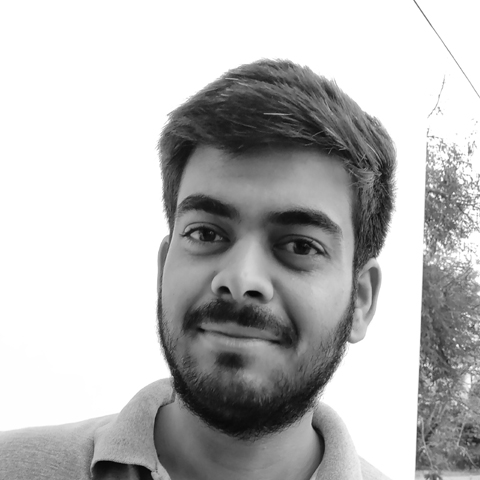

Probabilities for both classes :  [[0.1196404  0.00200616 0.08695172 0.08407119 0.38542008 0.3052616
  0.01664878]]
Max Prob class :  [4]
Image classified to :  neutral


In [27]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img = cv2.imread('Test.jpg',0)
cv2_imshow(img)
img = cv2.resize(img,(WIDTH,HEIGHT))
img = np.reshape(img,[1,WIDTH,HEIGHT,1])
classes = model.predict(img)
highest_probab_class = model.predict_classes(img)

#Classes will simply return probabilty of img in 7 classes, we can use armax
#here to get the max one.
print("Probabilities for both classes : ", classes)
print("Max Prob class : ", highest_probab_class)
print("Image classified to : ", class_labels[int(highest_probab_class)])

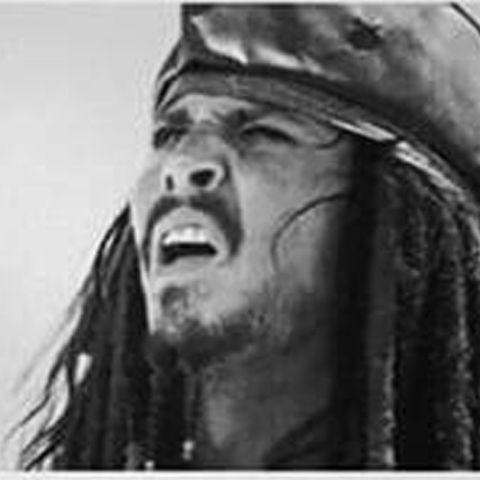

Probabilities for both classes :  [[0.1416964  0.00227003 0.07909978 0.06491137 0.35035905 0.3533064
  0.00835691]]
Max Prob class :  [5]
Image classified to :  sad


In [28]:
img = cv2.imread('Test2.jpg',0)
cv2_imshow(img)
img = cv2.resize(img,(WIDTH,HEIGHT))
img = np.reshape(img,[1,WIDTH,HEIGHT,1])
classes = model.predict(img)
highest_probab_class = model.predict_classes(img)

print("Probabilities for both classes : ", classes)
print("Max Prob class : ", highest_probab_class)
print("Image classified to : ", class_labels[int(highest_probab_class)])

Captain Jack looks more surpised than Sad!

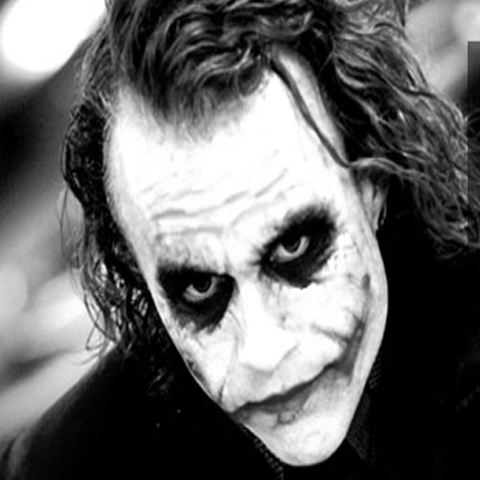

Probabilities for both classes :  [[0.22162238 0.00280509 0.10089485 0.06900271 0.2298422  0.34186587
  0.03396694]]
Max Prob class :  [5]
Image classified to :  sad


In [30]:
img = cv2.imread('Test3.jpg',0)
cv2_imshow(img)
img = cv2.resize(img,(WIDTH,HEIGHT))
img = np.reshape(img,[1,WIDTH,HEIGHT,1])
classes = model.predict(img)
highest_probab_class = model.predict_classes(img)

print("Probabilities for both classes : ", classes)
print("Max Prob class : ", highest_probab_class)
print("Image classified to : ", class_labels[int(highest_probab_class)])